<a href="https://colab.research.google.com/github/mahaveer-rulaniya/customer-analytics/blob/main/Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Attributes Description

Variable | Description
--------------|-----------
Variable |	Definition
ID |	Unique ID
Gender|	Gender of the customer
Ever_Married	|Marital status of the customer
Age	|Age of the customer
Graduated|	Is the customer a graduate?
Profession|	Profession of the customer
Work_Experience	|Work Experience in years
Spending_Score|	Spending score of the customer
Family_Size|	Number of family members for the customer (including the customer)
Var_1	|Anonymised Category for the customer

* Based on the attributes group Segment of the customer

* Context

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

---------------------------------------------------------

* Content

In their existing market, the sales team has to classify all customers into different number of segments. Then, they can perform segmented outreach and communication for different segment of customers. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries & Dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 2/Train_customer.csv')

In [7]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


### Data Wrangling

Geeting to know about the data types and other relavant information from data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9125 non-null   int64  
 1   Gender           9125 non-null   object 
 2   Ever_Married     8970 non-null   object 
 3   Age              9125 non-null   int64  
 4   Graduated        9041 non-null   object 
 5   Profession       8982 non-null   object 
 6   Work_Experience  8170 non-null   float64
 7   Spending_Score   9125 non-null   object 
 8   Family_Size      8733 non-null   float64
 9   Var_1            9034 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 713.0+ KB


Basic Cleaning by dropping the ID column

In [9]:
df = df.drop(['ID'], axis = 1)

In [11]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x]== 'object':
        cat_col.append(x)
    
    
for x in cat_col:
    print(x)
    print("-----------------")
    print(df[x].value_counts())
    print('-----------------')
 

Gender
-----------------
Male      5003
Female    4122
Name: Gender, dtype: int64
-----------------
Ever_Married
-----------------
Yes    5213
No     3757
Name: Ever_Married, dtype: int64
-----------------
Graduated
-----------------
Yes    5642
No     3399
Name: Graduated, dtype: int64
-----------------
Profession
-----------------
Artist           2854
Healthcare       1500
Entertainment    1071
Doctor            786
Engineer          769
Lawyer            727
Executive         658
Marketing         345
Homemaker         272
Name: Profession, dtype: int64
-----------------
Spending_Score
-----------------
Low        5563
Average    2193
High       1369
Name: Spending_Score, dtype: int64
-----------------
Var_1
-----------------
Cat_6    5938
Cat_4    1190
Cat_3     963
Cat_2     469
Cat_7     232
Cat_1     147
Cat_5      95
Name: Var_1, dtype: int64
-----------------


In [12]:
df.nunique()

Gender              2
Ever_Married        2
Age                67
Graduated           2
Profession          9
Work_Experience    15
Spending_Score      3
Family_Size         9
Var_1               7
dtype: int64

Statistical Discription of Numerical Variables

In [13]:
df.describe()

,Age,Work_Experience,Family_Size
count,9125.000000,8170.000000,8733.000000
mean,43.566795,2.635618,2.841292
std,16.798711,3.405982,1.535801
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


## Missing Values Treatment

If the missing data is Present in -
* Continuous variable feature - Fill Median or mean based on the distriution of feature variale
* Categorical Variable feature - Fill mode of the column in place of missing data

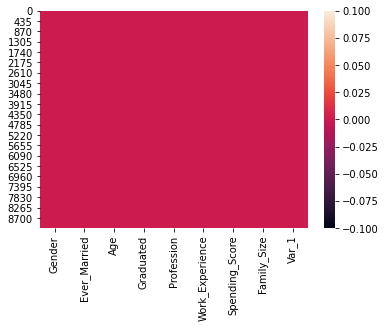

In [109]:
sns.heatmap(df.isnull())

In [110]:
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [111]:
df['Work_Experience'].mode()


0    1.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


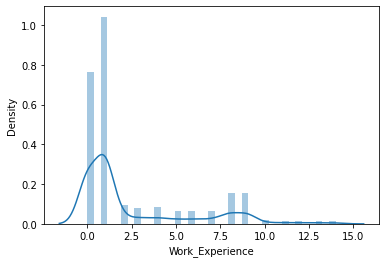

In [112]:
sns.distplot(df['Work_Experience'])

In [113]:
df['Ever_Married'] = df['Ever_Married'].fillna(df['Ever_Married'].mode()[0])
df['Graduated']= df['Graduated'].fillna(df['Graduated'].mode()[0])
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])
df['Work_Experience']= df['Work_Experience'].fillna(df['Work_Experience'].mode()[0])
df['Family_Size']= df['Family_Size'].fillna(df['Family_Size'].mode()[0])
df['Var_1'] = df['Var_1'].fillna(df['Var_1'].mode()[0])


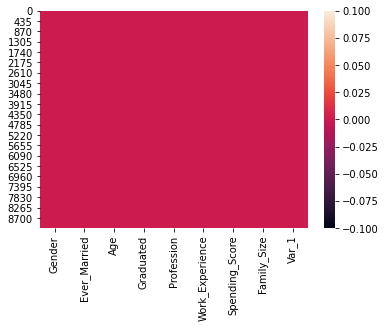

In [114]:
sns.heatmap(df.isnull())

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9125 non-null   int64  
 1   Ever_Married     9125 non-null   int64  
 2   Age              9125 non-null   int64  
 3   Graduated        9125 non-null   int64  
 4   Profession       9125 non-null   int64  
 5   Work_Experience  9125 non-null   float64
 6   Spending_Score   9125 non-null   int64  
 7   Family_Size      9125 non-null   float64
 8   Var_1            9125 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 641.7 KB


In [116]:
# 2 variable - Numerical (Work Experience & Age)
# remaining variable - Categorical


## Exploratory Data Analysis

**1. Variable Identification**
* Categorical 
     - Ordinal
     - Nominal
* Continuous 
-----------------------------------
**2. Univariate Analysis**
* For Categorical Variable - 
    - Count of data present in the dataset for particular variable
* For Continuous Variable - 
    - Find the Distribution of feature using Histogram
    - Outlier detection using Box Plot
------------------------
**3. Bi-Variate Analysis**
* Categorical - Continuous Variables ---> Bar Graph
* Continuous - Continuous Variables ---> Scatter Plot to see relationship
--------------------------------------------
**4. Outlier Detection**
* Box plot are the best statistical Measure for Outlier detection

5. Missing value Treatment
* Depending upon the dataset the missing value treatment can be done before EDA or after EDA process


### Univariate analysis

In [35]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


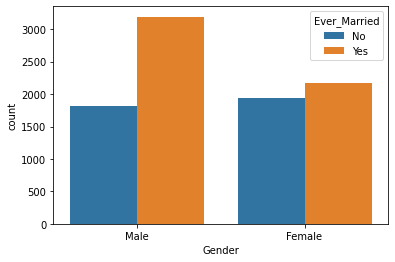

In [41]:
sns.countplot(df['Gender'], hue = df['Ever_Married'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


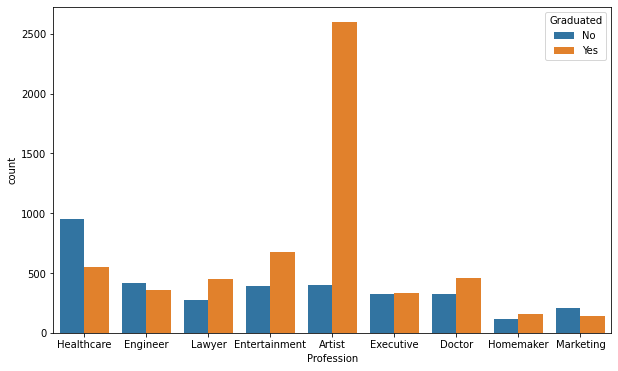

In [43]:
plt.figure(figsize = (10,6))
sns.countplot(df['Profession'], hue = df['Graduated'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


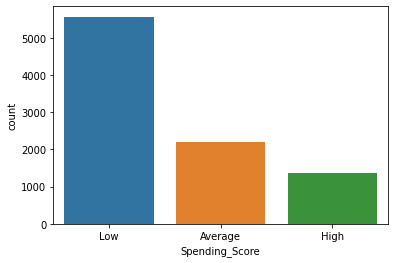

In [44]:
sns.countplot(df['Spending_Score'])

Pie plot of Profession
------------------------------------------------------------



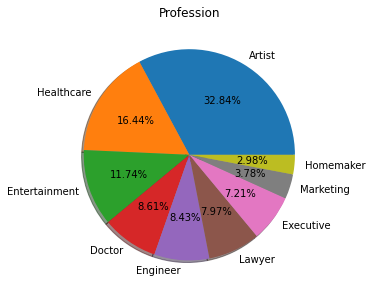

In [69]:
# Profession

print("Pie plot of Profession")
print('------------------------------------------------------------\n')


plt.subplot(1,1,1)  
label = df['Profession'].value_counts().index
value = df['Profession'].value_counts().values
plt.pie(value, labels = label,autopct='%1.2f%%', shadow=True, explode=None)
plt.title("Profession")

plt.tight_layout(pad=0.4)

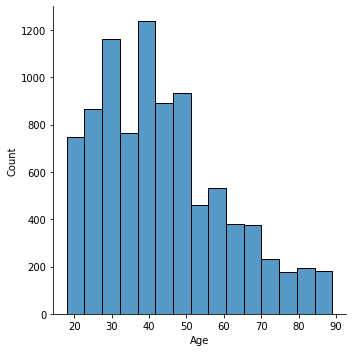

In [59]:

sns.displot(df['Age'], bins = 15)


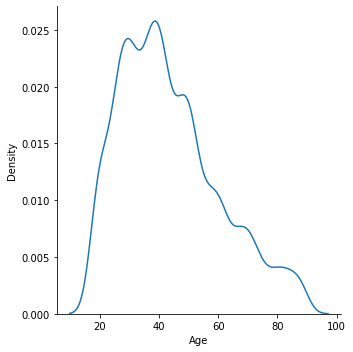

In [58]:
sns.displot(df['Age'], kind ='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


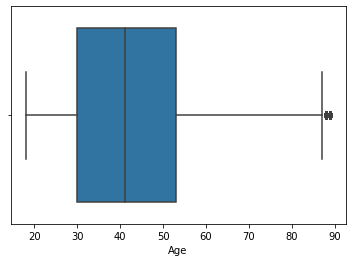

In [117]:
sns.boxplot(df['Age'])

We can se from the distribution as well as box plot that there are not much outliers which needs attention

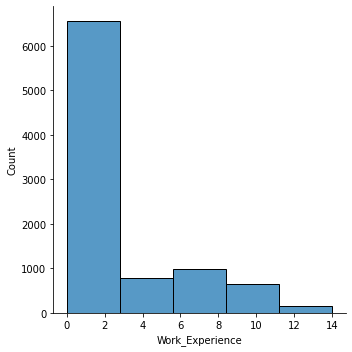

In [64]:
sns.displot(df['Work_Experience'], bins = 5)


### Bivariate Analysis

In [66]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


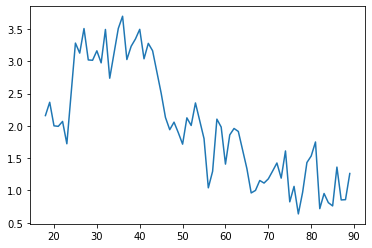

In [82]:
a  = df.groupby('Age').Work_Experience.mean()
plt.plot(a)

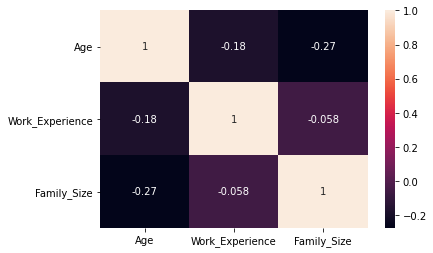

In [67]:
sns.heatmap(df.corr(), annot = True)

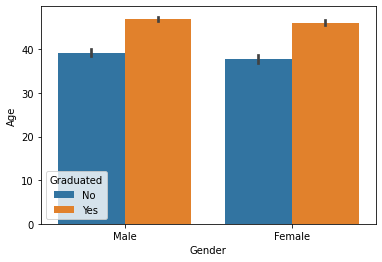

In [71]:
sns.barplot(x= df['Gender'], y = df['Age'], hue = df['Graduated'])

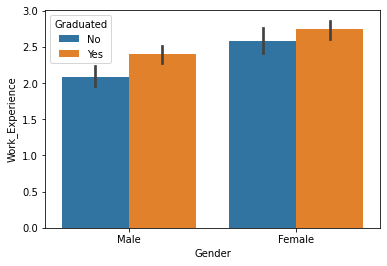

In [72]:
sns.barplot(x= df['Gender'], y = df['Work_Experience'], hue = df['Graduated'])

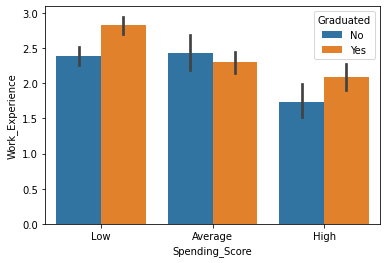

In [75]:
sns.barplot(x= df['Spending_Score'], y = df['Family_Size'], hue = df['Graduated'])

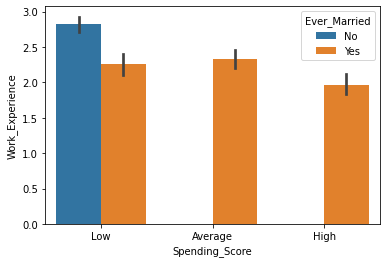

In [76]:
sns.barplot(x= df['Spending_Score'], y = df['Work_Experience'], hue = df['Ever_Married'])

In [77]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


# Data Preprocessing

**1. Feature Engineering**
* Based on the insights from the Exploratory Data Analysis some new feature are created and some are removed in order to give optimised output by the model
-------------------

**2. Feature Encoding**
* Since the Machine learning model accepts only Numerical values so the categorical variables which have 'object' data types are converted into numerical values depending upon the type of variable
   - *Ordinal Categorical variable* - Label Encoding
   - *Nominal Categorical Variable* - One Hot Encoding
------------------------

**3. Feature Scaling**
* Features are scaled to give the good output for some algorithms which depends on some similiarty function like - 
      - K-Means Clustering algorithm
      - K-NN algorithm
      - Principal Component Analysis 

## Feature Encoding
* One Hot Encoding
* Label Encoding

In [79]:
df['Ever_Married']= df['Ever_Married'].replace({'No':0 , 'Yes':1})
df['Graduated']= df['Graduated'].replace({'No':0 , 'Yes':1})
df['Spending_Score'] = df['Spending_Score'].replace({'Low':0,'Average':1,'High':2})

In [80]:
df.Var_1.unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [83]:
# Replacing Cat_1 with 1, Cat_2 with 2, Cat_3 with 3, Cat4 with 4, Cat_5 with 5, Cat_6 with 6, and Cat_7 with 7 in Var_1 column
df['Var_1'] = df['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})

In [85]:
# Replacing Male with 0 and Female with 1 in Gender column
df['Gender'] = df['Gender'].replace({'Male':0,'Female':1})

In [84]:
df['Profession'].value_counts()

Artist           2997
Healthcare       1500
Entertainment    1071
Doctor            786
Engineer          769
Lawyer            727
Executive         658
Marketing         345
Homemaker         272
Name: Profession, dtype: int64

In [86]:
df['Profession'] = df['Profession'].replace({'Artist':0,'Healthcare':1,'Entertainment':2,'Engineer':3,
                                             'Doctor':4,'Lawyer':5,'Executive':6,'Marketing':7,'Homemaker':8})

In [87]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,0,22,0,1,1.0,0,4.0,4
1,1,1,38,1,3,1.0,1,3.0,4
2,1,1,67,1,3,1.0,0,1.0,6
3,0,1,67,1,5,0.0,2,2.0,6
4,1,1,40,1,2,1.0,2,6.0,6


## Feature Scaling

In [88]:
# Obtain the optimal number of clusters

In [89]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [90]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)


# Applying Clustering Technique

### Elbow Method to obtain Optimal Number of Clusters

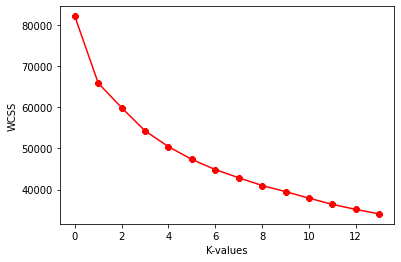

In [92]:
wcss=[]
range_values=range(1,15)


for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(wcss, color = 'red', marker = '8')
plt.xlabel('K-values')
plt.ylabel('WCSS')
plt.show()

In [93]:
# We can take the k - value to be 4 or 5

### Apply K-mean clustering algorithm considering k = 4

In [97]:
kmeans=KMeans(4).fit(df_scaled)

In [98]:
labels=kmeans.labels_
kmeans.cluster_centers_.shape

(4, 9)

In [99]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.300822,-1.166178,-0.347778,0.577608,-0.218778,0.329784,-0.729699,-0.568415,0.187922
1,-0.159334,0.821316,1.000855,-0.239369,1.197992,-0.168384,0.934700,-0.104849,0.162489
2,-0.067949,0.836593,0.237183,0.537582,-0.644524,-0.053764,0.304302,-0.104607,0.083765
3,-0.028586,-0.925824,-0.977500,-1.100561,0.011204,-0.067801,-0.657544,0.782978,-0.452840


In [100]:

cluster_centers=scaler.inverse_transform(cluster_centers)

In [101]:
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.601434,0.014344,37.724898,0.906762,1.808914,3.539959,-1.787459e-14,1.945697,5.418033
1,0.372431,0.992481,60.378947,0.511779,5.187469,1.915288,1.232581e+00,2.646617,5.381955
2,0.417910,1.000000,47.550941,0.887411,0.793640,2.289098,7.657365e-01,2.646982,5.270279
3,0.437500,0.132634,27.146947,0.095420,2.357347,2.243321,5.343511e-02,3.989027,4.509065


In [102]:
y_kmeans=kmeans.fit_predict(df_scaled)

In [103]:
df_cluster=pd.concat([df,pd.DataFrame({'cluster':labels})],axis=1)

df_cluster.head(9)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,cluster
0,0,0,22,0,1,1.0,0,4.0,4,3
1,1,1,38,1,3,1.0,1,3.0,4,2
2,1,1,67,1,3,1.0,0,1.0,6,2
3,0,1,67,1,5,0.0,2,2.0,6,1
4,1,1,40,1,2,1.0,2,6.0,6,2
5,0,1,56,0,0,0.0,1,2.0,6,2
6,0,0,32,1,1,1.0,0,3.0,6,0
7,1,0,33,1,1,1.0,0,3.0,6,0
8,1,1,61,1,3,0.0,0,3.0,7,2


In [104]:
## Apply Principal Component Analysis (PCA) technique to perform dimensionality reduction and data visualization

# Principal Component Analysis (PCA) technique

* To Perform Dimensionality Reduction
* Data Visualization

In [105]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(df_scaled)
principal_comp

array([[-2.25066672,  1.18725021],
       [ 0.62433438,  0.19540444],
       [ 1.35713644, -1.47785023],
       ...,
       [ 1.46978324,  0.75076587],
       [-2.39242844,  1.24604064],
       [-2.38273198,  1.61847844]])

In [106]:
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.250667,1.187250
1,0.624334,0.195404
2,1.357136,-1.477850
3,2.897506,0.436680
4,1.215228,1.027937


In [107]:
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-2.250667,1.187250,3
1,0.624334,0.195404,2
2,1.357136,-1.477850,2
3,2.897506,0.436680,1
4,1.215228,1.027937,2


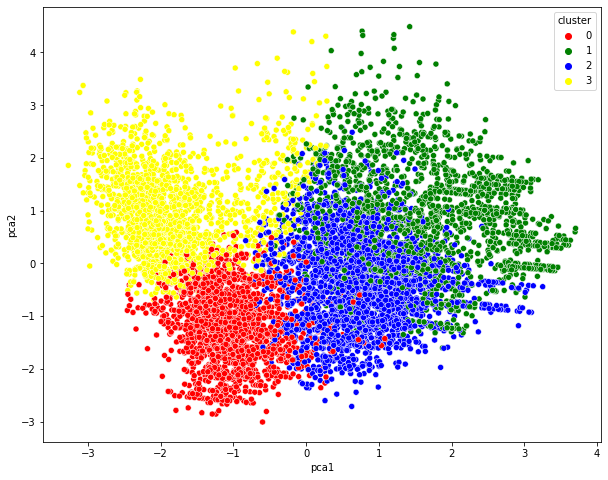

In [108]:
plt.figure(figsize=(10,8))
ax=sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette=['red','green','blue','yellow'])
plt.show()